<a href="https://colab.research.google.com/github/kon-si/ntua_img_vid_analysis/blob/master/anal_eik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [102]:
import numpy as np
from skimage import data
from matplotlib import pyplot as plt
import math

IPad

In [103]:
def IPad(I):  #methodos reflect
  padded_I = np.zeros((len(I)+4,len(I[0])+4))
  padded_I[2:len(padded_I)-2,2:len(padded_I[0])-2] = I
  padded_I[0,1:len(I[0])+1], padded_I[1,1:len(I[0])+1] = I[0], I[0]
  padded_I[len(I),1:len(I[0])+1], padded_I[len(I)+1,1:len(I[0])+1] = I[len(I)-1], I[len(I)-1]
  padded_I[1:len(I)+1,0], padded_I[1:len(I)+1,1] = I[0:len(I),0], I[0:len(I),0]
  padded_I[1:len(I)+1,len(I[0])], padded_I[1:len(I)+1,len(I[0])+1] = I[0:len(I),len(I[0])-1], I[0:len(I),len(I[0])-1]
  return padded_I

Gkernel

In [104]:
def Gkernel(a):
  w_cup = np.array([1/4-a/2,1/4,a,1/4,1/4-a/2])
  h = np.zeros((5,5))
  for i in range(5):
    for j in range(5):
      h[i][j] = w_cup[i]*w_cup[j]
  return h

GREDUCE

Text(0.5, 1.0, 'Rocket')

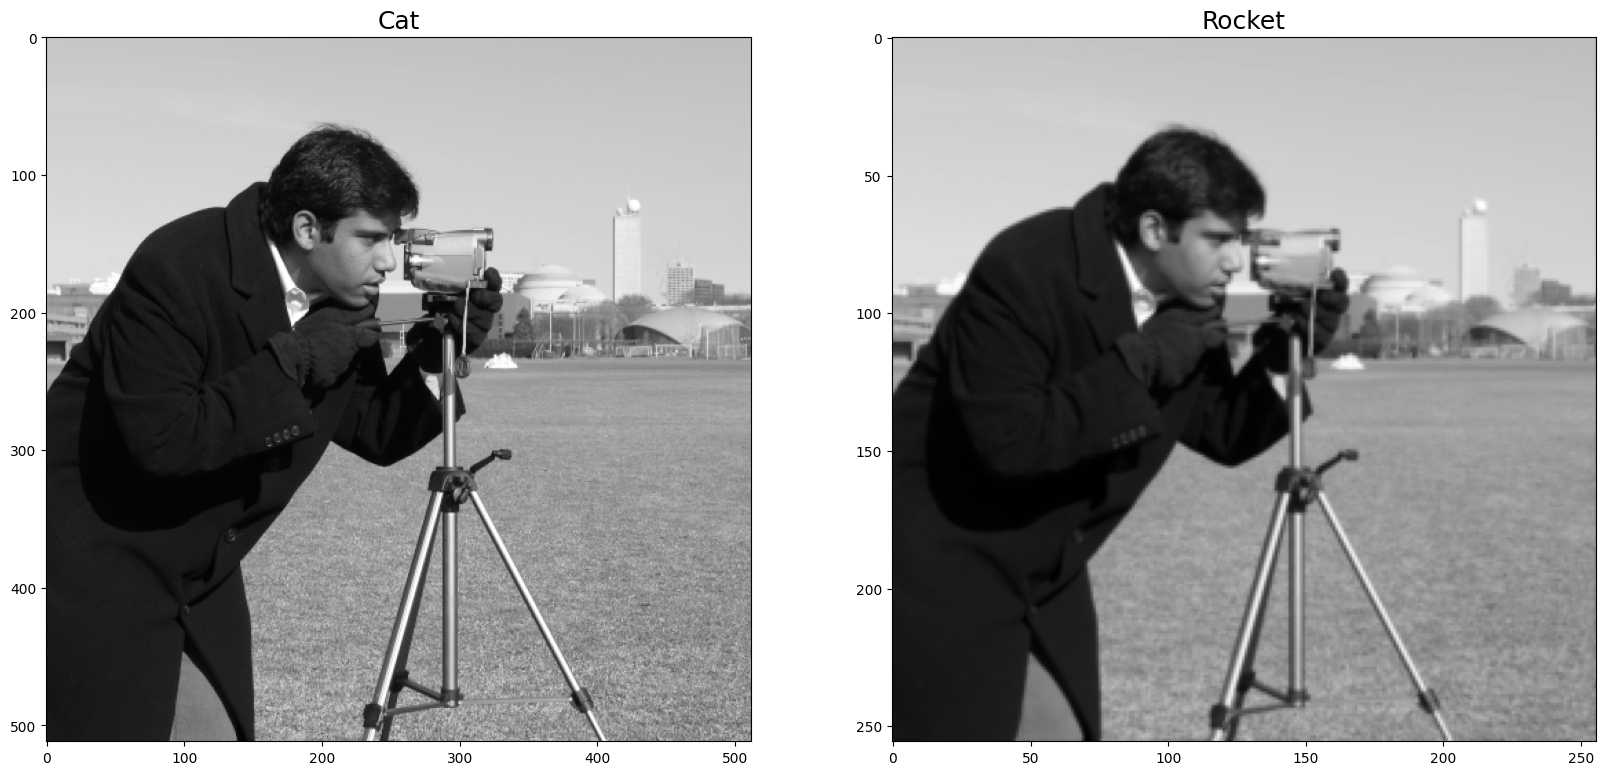

In [105]:
def GREDUCE(I,h):
  padded_I = IPad(I)
  ret_arr = np.zeros((len(I)//2,len(I[0])//2))
  for i in range(len(I)//2):
    for j in range(len(I[0])//2):
      ret_arr[i,j] = sum(sum(np.multiply(h, padded_I[(2*(i+1)-2):(2*(i+1)+2)+1, (2*(j+1)-2):(2*(j+1)+2)+1])))
  return ret_arr

B = data.camera()

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10)) # (lines, columns, inches)

ax0.imshow(B, cmap='gray')
ax0.set_title('Cat', fontsize=18)

ax1.imshow(GREDUCE(B,Gkernel(0.4)), cmap='gray')
ax1.set_title('Rocket', fontsize=18)

GPyramid

Text(0.5, 1.0, 'Rocket4')

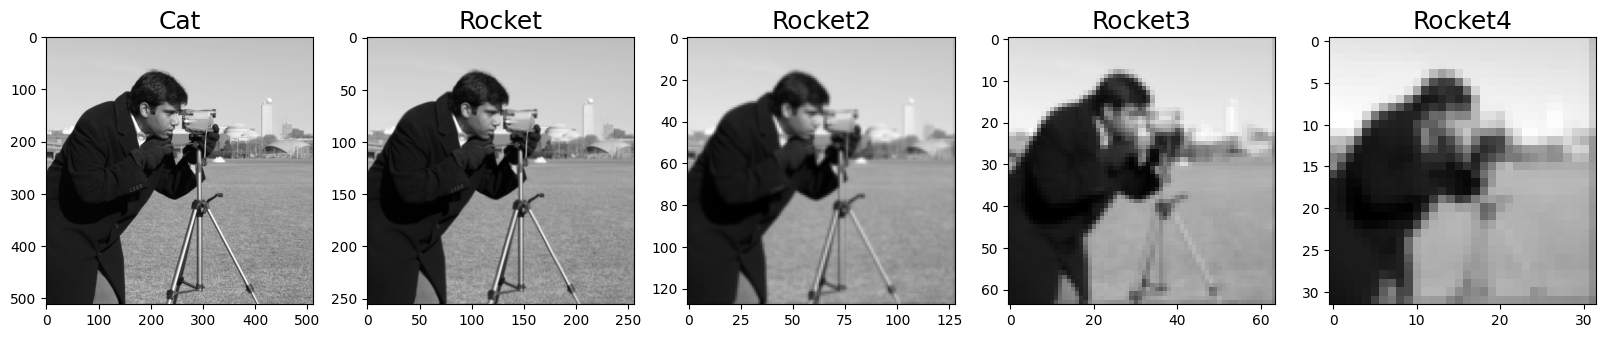

In [106]:
def GPyramid(I, a, depth):
  gkernel = Gkernel(a)
  gpyr=[]
  gpyr.append(I)
  for i in range(1, depth):
    gpyr.append(GREDUCE(gpyr[i-1], gkernel))
  return gpyr

B = data.camera()
gpyr = GPyramid(B, 0.4, 5)

f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize=(20, 10)) # (lines, columns, inches)

ax0.imshow(gpyr[0], cmap='gray')
ax0.set_title('Cat', fontsize=18)

ax1.imshow(gpyr[1], cmap='gray')
ax1.set_title('Rocket', fontsize=18)

ax2.imshow(gpyr[2], cmap='gray')
ax2.set_title('Rocket2', fontsize=18)

ax3.imshow(gpyr[3], cmap='gray')
ax3.set_title('Rocket3', fontsize=18)

ax4.imshow(gpyr[4], cmap='gray')
ax4.set_title('Rocket4', fontsize=18)

 GEXPAND

Text(0.5, 1.0, 'Rocket')

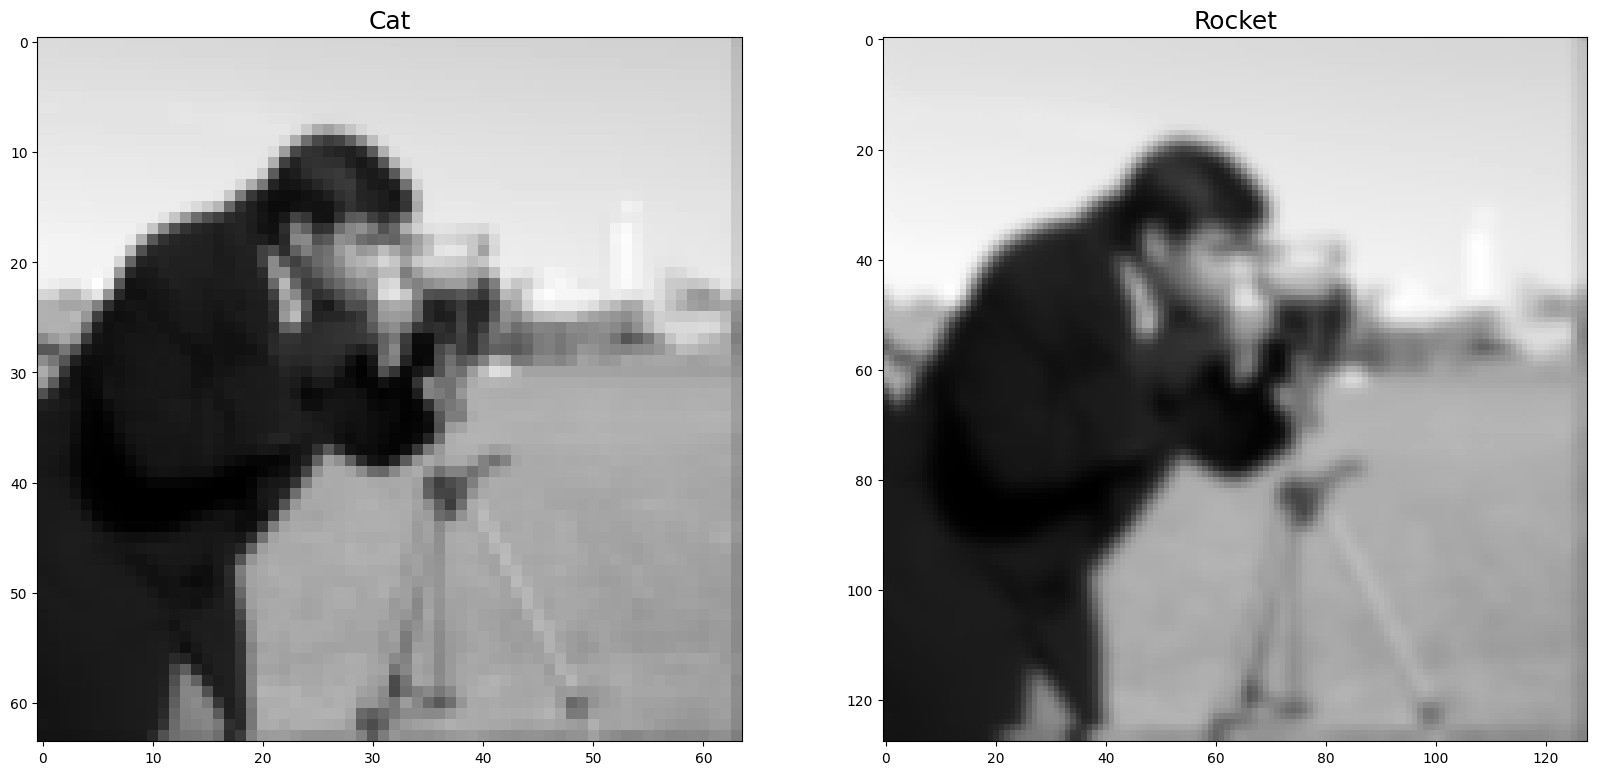

In [107]:
def GEXPAND (I, h):
  padded_I = IPad(I)
  ret_arr = np.zeros((len(I)*2,len(I[0])*2))
  for i in range(len(I)*2):
    for j in range(len(I[0])*2):
      for m in range(-2,3):
        for n in range(-2,3):
          if ((i-m)%2 == 0 and (j-n)%2 == 0):
            ret_arr[i,j] += h[m+2,n+2]*padded_I[(i+2-m)//2,(j+2-n)//2]
      ret_arr[i,j] *= 4
  return ret_arr

B = data.camera()
gpyr = GPyramid(B, 0.4, 10)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10)) # (lines, columns, inches)

ax0.imshow(gpyr[3], cmap='gray')
ax0.set_title('Cat', fontsize=18)

ax1.imshow(GEXPAND(gpyr[3],Gkernel(0.4)), cmap='gray')
ax1.set_title('Rocket', fontsize=18)

LPyramid

Text(0.5, 1.0, 'Rocket4')

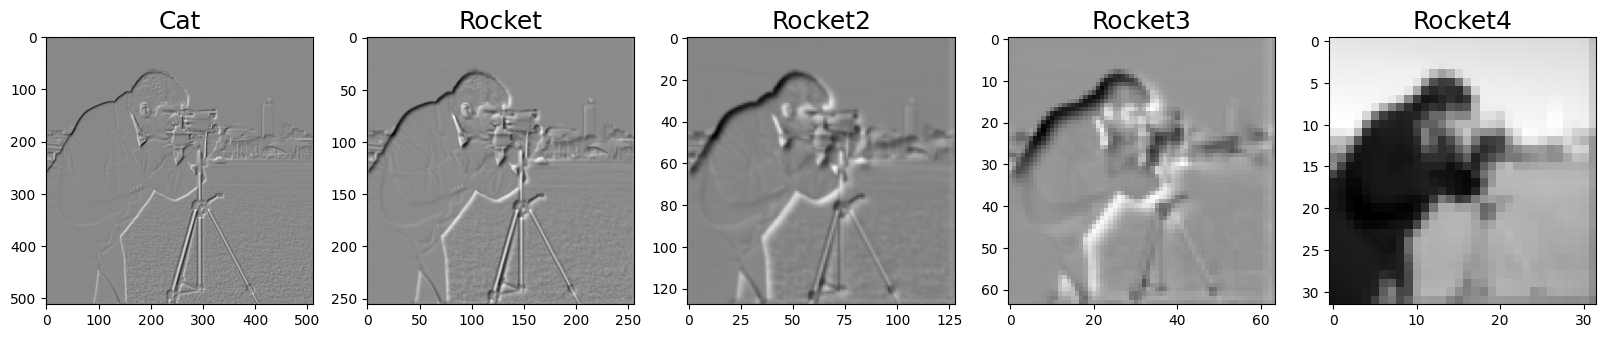

In [99]:
def LPyramid(I, a, depth):
  gPyramid = GPyramid(I, a, depth)
  lPyramid = []
  kernel = Gkernel(a)
  for i in range(len(gPyramid)-1):
    lPyramid.append(gPyramid[i] - GEXPAND(gPyramid[i+1], kernel))

  lPyramid.append(gPyramid[-1])
  return lPyramid

B = data.camera()
lpyr = LPyramid(B, 0.4, 5)

f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize=(20, 10)) # (lines, columns, inches)

ax0.imshow(lpyr[0], cmap='gray')
ax0.set_title('Cat', fontsize=18)

ax1.imshow(lpyr[1], cmap='gray')
ax1.set_title('Rocket', fontsize=18)

ax2.imshow(lpyr[2], cmap='gray')
ax2.set_title('Rocket2', fontsize=18)

ax3.imshow(lpyr[3], cmap='gray')
ax3.set_title('Rocket3', fontsize=18)

ax4.imshow(lpyr[4], cmap='gray')
ax4.set_title('Rocket4', fontsize=18)

L_Pyramid_Decode

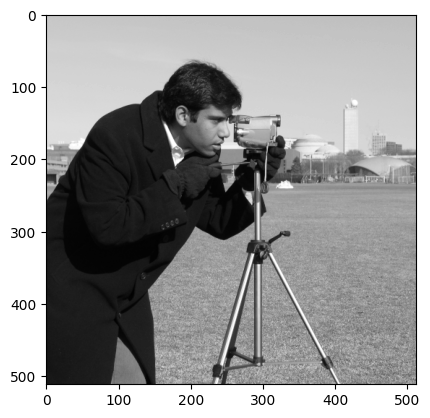

In [100]:
def L_Pyramid_Decode(L,a):
  kernel = Gkernel(a)
  g = [L[-1]]
  for i in range(1, len(L)): 
    g.append(L[-1-i] + GEXPAND(g[i-1], kernel))
  return g[-1]

B = data.camera()
plt.imshow(L_Pyramid_Decode(LPyramid(B,0.4,10),0.4), cmap='gray')

L_Quantization

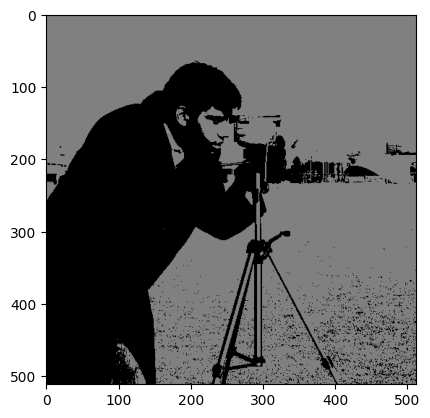

In [120]:
def L_Quantization(I,n):
  min = np.min(I)
  max = np.max(I)
  bin_range = max - min
  bin_size = bin_range / n
  quant_I = np.zeros((len(I), len(I[0])))
  for i in range(len(I)):
    for j in range(len(I[0])):
      quant_I[i][j] = min + (math.floor(((I[i][j] - min) / bin_size)) * bin_size + bin_size/2)
  return quant_I

B = data.camera()
plt.imshow(L_Quantization(L_Pyramid_Decode(LPyramid(B,0.4,10),0.4), 2), cmap='gray')